In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
train = pd.read_csv('../train.csv')
y_train=train.target
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
test=pd.read_csv('../test.csv')
test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [7]:
train.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

In [8]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re, string

nltk.download('stopwords')
nltk.download('wordnet') 
nltk.download('omw-1.4')
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
# cleaning the data
def clean_text(text):
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    text = nopunct.split(' ')
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(text)) # remove unicode characters
    text = re.sub(r'[^a-zA-Z\s]+', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop]) # remove stop words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')]) # lemmatization
    text = re.sub(' +', ' ', text) # remove extra spaces
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ngammas1/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/ngammas1/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/ngammas1/nltk_data...


In [9]:
from tqdm import tqdm
tqdm.pandas()
train_clean = train
train_clean['clean_text'] = train['question_text'].progress_apply(clean_text)


100%|██████████| 1306122/1306122 [01:23<00:00, 15587.76it/s]


In [10]:
train_clean.head()

,qid,question_text,target,clean_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,quebec nationalist see province nation
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,adopted dog would encourage people adopt shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,otto von guericke used magdeburg hemisphere
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,convert montra helicon mountain bike changing ...


In [11]:
train_clean.to_csv('../Project/train_clean.csv')

In [15]:
train_clean.drop('qid',axis=1).drop('question_text',axis=1)

,target,clean_text
0,0,quebec nationalist see province nation
1,0,adopted dog would encourage people adopt shop
2,0,velocity affect time velocity affect space geo...
3,0,otto von guericke used magdeburg hemisphere
4,0,convert montra helicon mountain bike changing ...
...,...,...
1306117,0,technical skill need computer science undergra...
1306118,0,m ece good job prospect usa like india job pre...
1306119,0,foam insulation toxic
1306120,0,one start research project based biochemistry ...


In [16]:
vectorizer=TfidfVectorizer(analyzer='word',stop_words='english')
X_train=vectorizer.fit_transform(train_clean.clean_text)
X_test=vectorizer.transform(test.question_text)

In [19]:
print(X_test)

  (0, 162483)	0.43765568101963837
  (0, 128715)	0.4257664379438937
  (0, 116245)	0.3299496540361065
  (0, 85992)	0.37516679759785193
  (0, 17013)	0.3871051232470938
  (0, 8888)	0.4771930097238259
  (1, 161640)	0.2602791710072775
  (1, 144656)	0.2616116424002039
  (1, 129043)	0.3382284061041938
  (1, 126087)	0.4521369992218047
  (1, 47279)	0.37765349407521803
  (1, 29331)	0.29617522673571056
  (1, 29017)	0.358164326133603
  (1, 7731)	0.4316991659772374
  (2, 123023)	0.3703933548768233
  (2, 116465)	0.6700932008626772
  (2, 104179)	0.5805393085966969
  (2, 85375)	0.2770522983026356
  (4, 123023)	0.373916878568291
  (4, 111433)	0.2744442912141501
  (4, 103718)	0.555447844180861
  (4, 88997)	0.43427649968058996
  (4, 60016)	0.2956427360169343
  (4, 45144)	0.4475974595572885
  (5, 151965)	0.5014576944132678
  :	:
  (375800, 106039)	0.5460525552225467
  (375800, 76145)	0.33360277122606646
  (375800, 55760)	0.5396311573418163
  (375801, 85859)	0.6271552031462386
  (375801, 70587)	0.5744314894

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
lrScore=lr.score(X_train,y_train)
lrScore

0.9517250302804792

In [44]:
baselineScore=y_train[y_train==0].shape[0]/y_train.shape[0]
baselineScore

0.9381298224821265

In [45]:
lrScore-baselineScore

0.01359520779835266

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

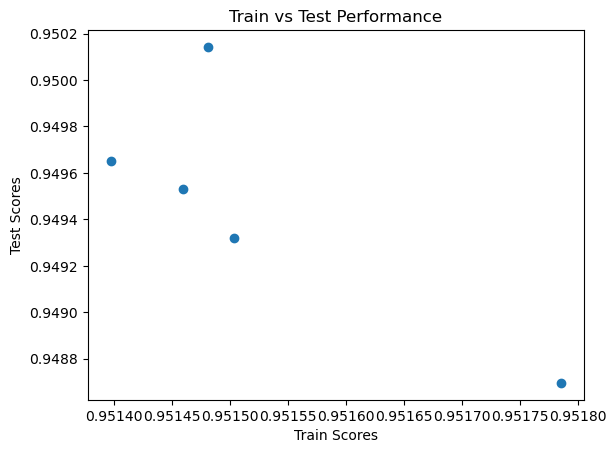

In [35]:
cv_results=cross_validate(lr,X_train,y_train,return_train_score=True,n_jobs=-1)
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

plt.scatter(train_scores, test_scores)
plt.xlabel('Train Scores')
plt.ylabel('Test Scores')
plt.title('Train vs Test Performance')
plt.show()